## Graph Neural Network Property Predictor


## Imports

In [1]:
# Main Imports
import torch
import random
import numpy as np
import pandas as pd

# Profiling
import cProfile
import pstats
from pstats import SortKey

# Import Local Files
from model import GNN
from utils.config import FEATURE_NAMES, RESIDUAL_G_FEATURES, TRAINING_CONFIG
import utils.data_utils as DataUtils
import utils.visualization as Visualization
from utils.feature_analysis import permutation_feature_importance
from utils.visualization import plot_feature_importance

c:\Users\Will\miniforge3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Execution

In [2]:
# Profile the main training routine
# profiler = cProfile.Profile()
# profiler.enable()

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# For reference
"""
GRAPH_METRICS = [
    "Density",
    "AvgClustering",
    "AvgPathLength",
    "DegreeAssortativity",
    "Transitivity",
    "ConnectedComponents",
    "MaxDegree",
    "MinDegree",
    "AvgDegree",
    "GlobalEfficiency"
]
"""

# Select target feature for analysis
target_feature = "GMinus_" + "GlobalEfficiency"

# Make sure the user only selects a feature in P(G/G')
if target_feature not in RESIDUAL_G_FEATURES:
    raise ValueError(
        f"Invalid target feature: {target_feature}\n"
        f"Target feature must be one of the following G/G' metrics:\n"
        f"{', '.join(RESIDUAL_G_FEATURES)}"
    )

target_idx = RESIDUAL_G_FEATURES.index(target_feature)

# Generate different graphs for training and test to test generalization
print("Generating graphs...")
G_train, selected_nodes_train = DataUtils.generate_graph(num_nodes=TRAINING_CONFIG["graph_size"], edge_prob=0.2)
G_test, selected_nodes_test = DataUtils.generate_graph(num_nodes=TRAINING_CONFIG["graph_size"], edge_prob=0.2)

print(f"Train graph: {len(G_train)} nodes, {G_train.number_of_edges()} edges")
print(f"Test graph: {len(G_test)} nodes, {G_test.number_of_edges()} edges")

print("\nProcessing graph data...")
train_data = DataUtils.process_graph_data(G_train, selected_nodes_train, target_idx)
test_data = DataUtils.process_graph_data(G_test, selected_nodes_test, target_idx)

# Initialize Model
print("\nInitializing model...")
node_feature_dim = train_data.x.shape[1]
print(f"Node feature dimension: {node_feature_dim}")
print(f"FEATURE_NAMES length: {len(FEATURE_NAMES)}")

# # Make sure the dimensions match
# if node_feature_dim != len(FEATURE_NAMES):
#     print(f"Warning: Feature dimension mismatch! Expected {len(FEATURE_NAMES)}, got {node_feature_dim}")

model = GNN(node_feature_dim=len(FEATURE_NAMES))
# print(f"Model parameters: {sum(p.numel() for p in model.parameters())}")

# Train model
print("\nTraining model...")
losses, trained_model, feature_stats = model.train_model(
    model, 
    train_data=train_data,
    test_data=test_data, 
    target_idx=target_idx
)

# Calculate elapsed time and profiling results
# profiler.disable()
# print("\nProfiling Results:")
# stats = pstats.Stats(profiler).sort_stats(SortKey.TIME)
# stats.print_stats(20)  # Show top 20 time-consuming functions



Generating graphs...
Train graph: 100 nodes, 976 edges
Test graph: 100 nodes, 1034 edges

Processing graph data...

Initializing model...
Node feature dimension: 11
FEATURE_NAMES length: 11

Training model...

Training Progress:
Epoch 0: Train Loss = 6.1541e-02, Test Loss = 4.2512e-02
Epoch 1: Train Loss = 4.4315e-02, Test Loss = 3.1274e-02
Epoch 2: Train Loss = 3.0610e-02, Test Loss = 2.0289e-02
Epoch 3: Train Loss = 1.9956e-02, Test Loss = 1.1885e-02
Epoch 4: Train Loss = 1.3080e-02, Test Loss = 5.7295e-03
Epoch 5: Train Loss = 6.6614e-03, Test Loss = 2.5545e-03
Epoch 6: Train Loss = 2.4395e-03, Test Loss = 2.5046e-04
Epoch 7: Train Loss = 5.9204e-04, Test Loss = 5.3352e-05
Epoch 8: Train Loss = 3.7845e-07, Test Loss = 1.0938e-03
Epoch 9: Train Loss = 5.3444e-04, Test Loss = 2.9667e-03
Epoch 10: Train Loss = 1.7262e-03, Test Loss = 4.2936e-03
Epoch 11: Train Loss = 3.5271e-03, Test Loss = 6.3444e-03
Epoch 12: Train Loss = 4.4713e-03, Test Loss = 7.8172e-03
Epoch 13: Train Loss = 6.21

## Visualization

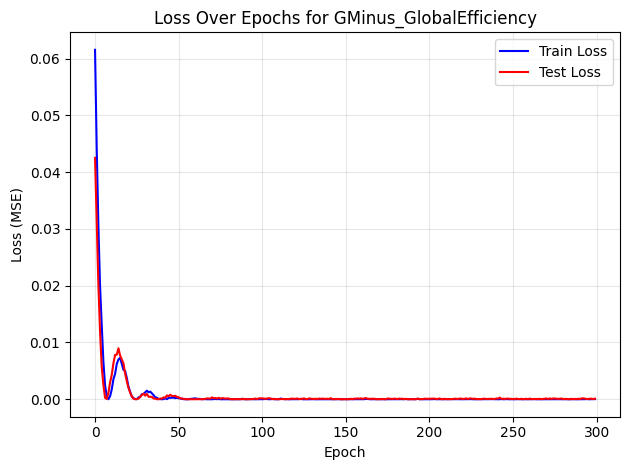


Model Predictions Analysis:
Using 300 sampled target values from training
Average prediction: 0.593012
Average actual value: 0.594497
Std dev of actual values: 0.001962
Average absolute error: 0.001976
Standard deviation of predictions: 0.028888


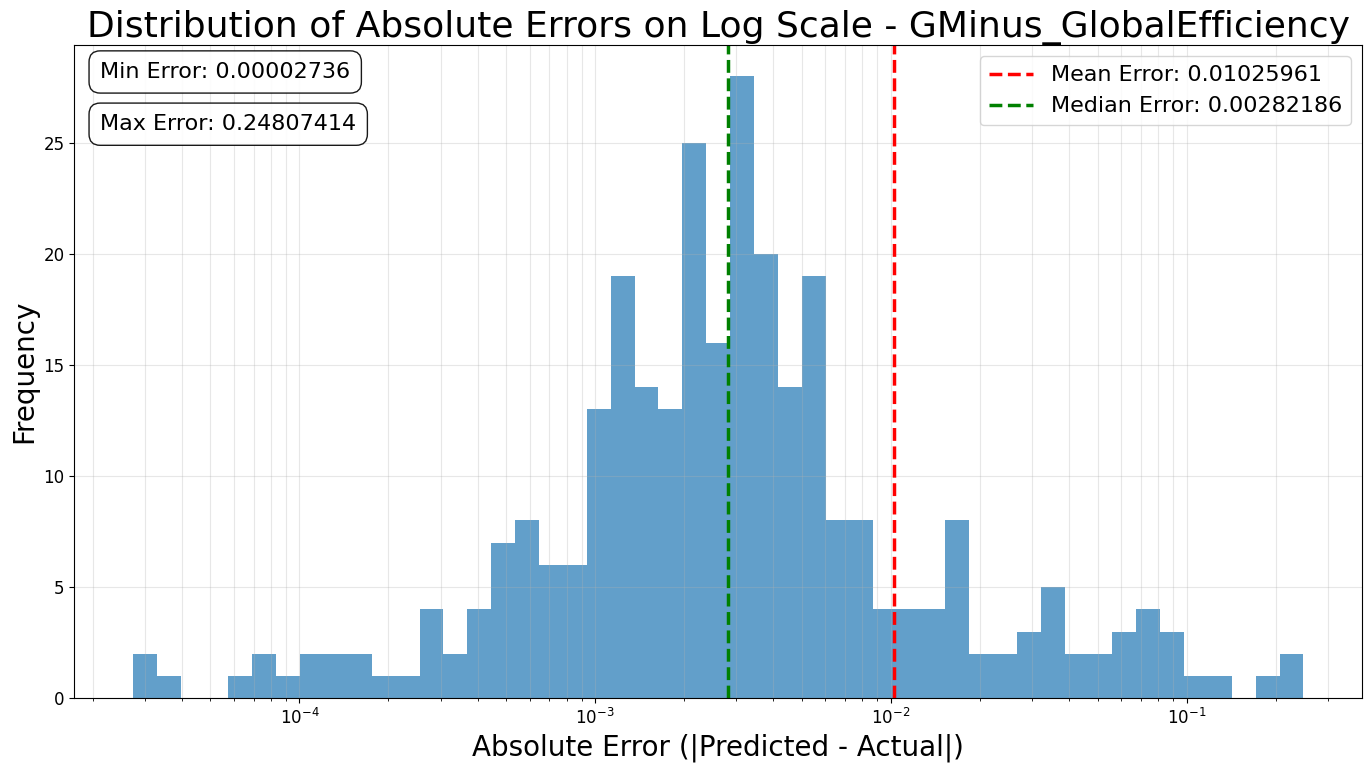

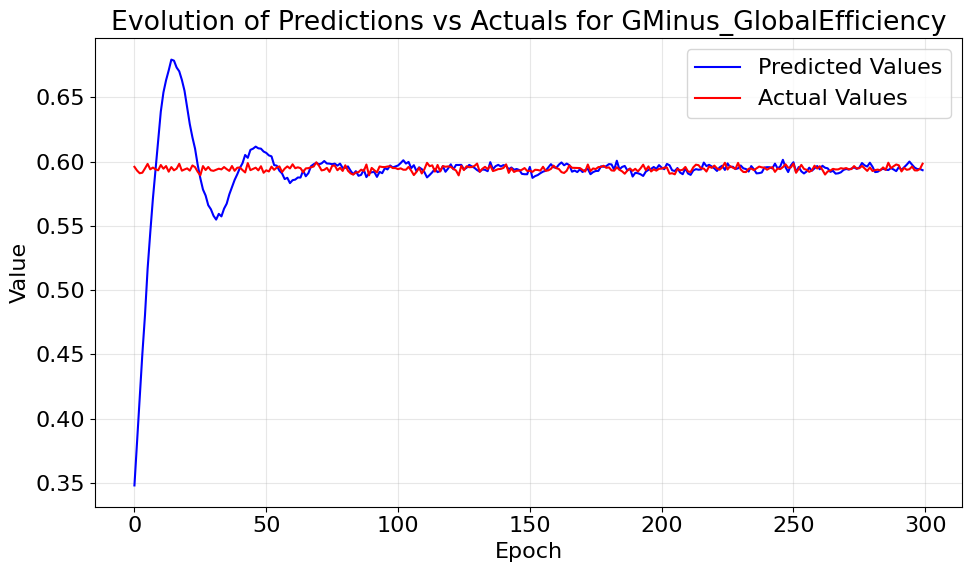


=== Node Feature Statistics ===
                 Feature     Mean      Min      Max  Std Dev  Variance  All Identical
      Node_Metric_Degree 0.650667 0.300000 1.000000 0.135686  0.018411          False
  Node_Metric_Clustering 0.200884 0.106061 0.305556 0.036151  0.001307          False
 Node_Metric_NeighborDeg 0.679499 0.609524 0.766667 0.029766  0.000886          False
 Node_Metric_Betweenness 0.086683 0.000442 0.345173 0.077755  0.006046          False
   Node_Metric_Closeness 5.502207 4.950000 5.892857 0.168482  0.028386          False
    Node_Metric_PageRank 0.100000 0.055831 0.144271 0.017067  0.000291          False
  Node_Metric_CoreNumber 0.993846 0.692308 1.000000 0.035551  0.001264          False
    Node_Metric_LocalEff 0.320216 0.263636 0.383333 0.020513  0.000421          False
 Node_Metric_Eigenvector 0.977521 0.453679 1.510626 0.210840  0.044453          False
Node_Metric_LocalDensity 0.281743 0.214286 0.444444 0.036168  0.001308          False
  Node_Metric_IsSelec

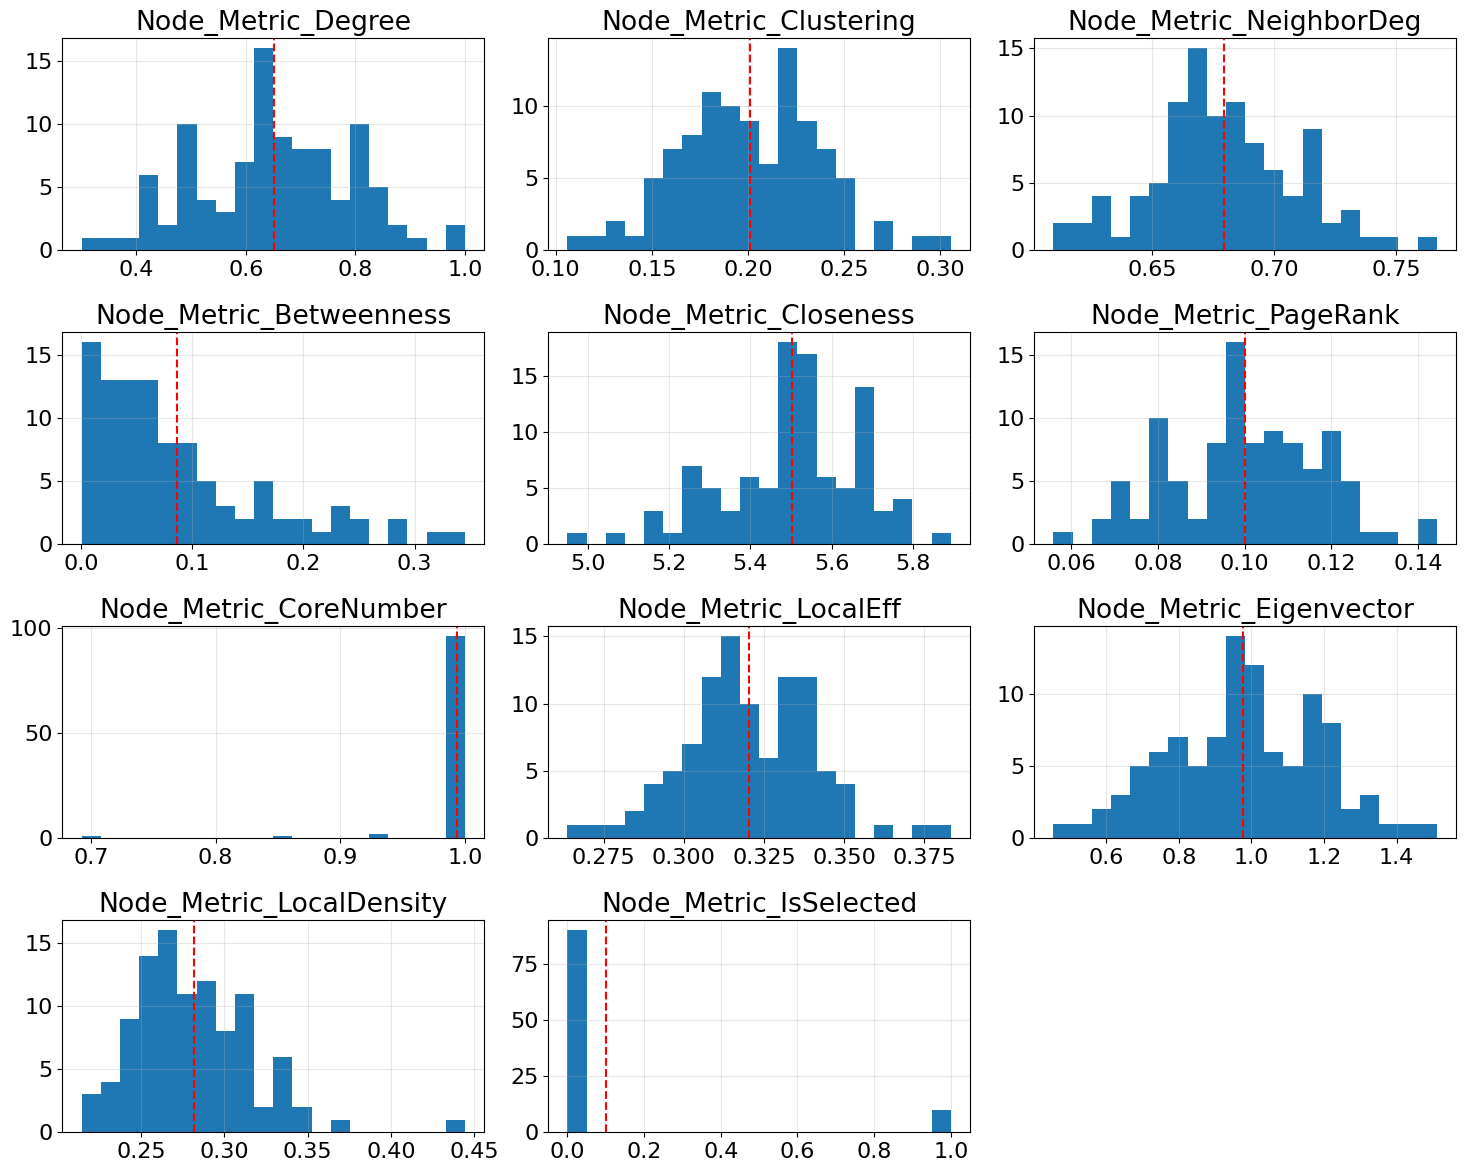

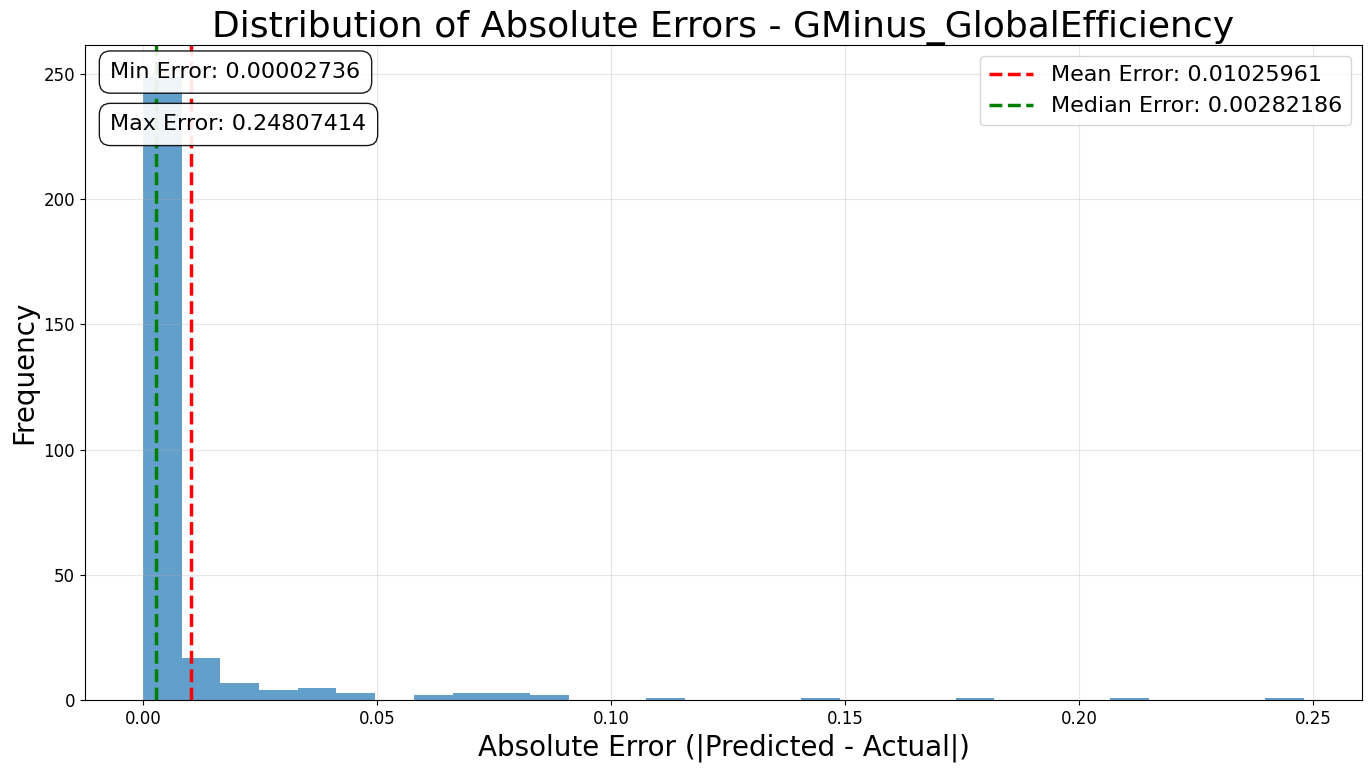


Performing PCA on node features...
Using raw node features

PCA Explained Variance:
  PC1: 88.91% (Cumulative: 88.91%)
  PC2: 5.14% (Cumulative: 94.05%)
  PC3: 3.44% (Cumulative: 97.49%)

Feature Contributions to Top Components:
                               PC1       PC2
Node_Metric_Eigenvector   0.692177 -0.201043
Node_Metric_Closeness     0.549755  0.041504
Node_Metric_Degree        0.445816  0.020493
Node_Metric_Betweenness   0.105556  0.944022
Node_Metric_LocalDensity -0.056165 -0.133423
Node_Metric_PageRank      0.055889  0.007567
Node_Metric_CoreNumber    0.049734  0.004983
Node_Metric_Clustering    0.003649 -0.121805
Node_Metric_LocalEff      0.001242 -0.087217
Node_Metric_NeighborDeg   0.000335 -0.161044


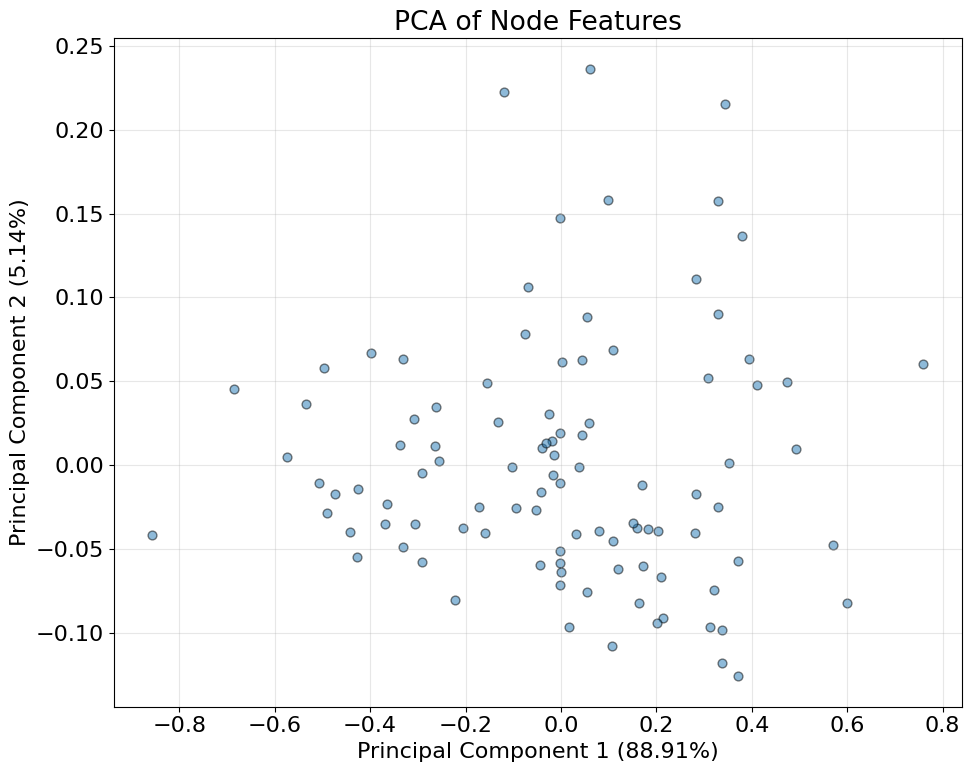

In [3]:
# Do visualization
Visualization.visualize_results(losses, trained_model, test_data, target_feature, feature_stats)
feature_stats_df = Visualization.visualize_feature_statistics(train_data, show_histograms=True)
Visualization.plot_error_distribution(
    feature_stats.predicted_values.cpu().numpy(), 
    feature_stats.actual_values.cpu().numpy(), 
    target_feature, 
    log_scale=False
)
# Visualization.visualize_feature_pairs(train_data, num_pairs=15, prioritize_variance=True, use_node_features=True)
pca, components = Visualization.visualize_pca(train_data, n_components=3, use_node_features=True)

## Feature Importance Analysis


Calculating permutation feature importance...
Baseline test_loss: 0.000089


Features: 100%|██████████| 11/11 [00:00<00:00, 374.36it/s]

  Node_Metric_Degree: -0.000035 ± 0.000014
  Node_Metric_Clustering: 0.000001 ± 0.000003
  Node_Metric_NeighborDeg: 0.000010 ± 0.000002
  Node_Metric_Betweenness: -0.000056 ± 0.000003
  Node_Metric_Closeness: -0.000022 ± 0.000015
  Node_Metric_PageRank: -0.000000 ± 0.000000
  Node_Metric_CoreNumber: -0.000001 ± 0.000001
  Node_Metric_LocalEff: -0.000000 ± 0.000000
  Node_Metric_Eigenvector: 0.000169 ± 0.000054
  Node_Metric_LocalDensity: 0.000001 ± 0.000005


Updated sheet 'GlobalEfficiency' in existing file: results/feature_importances.xlsx


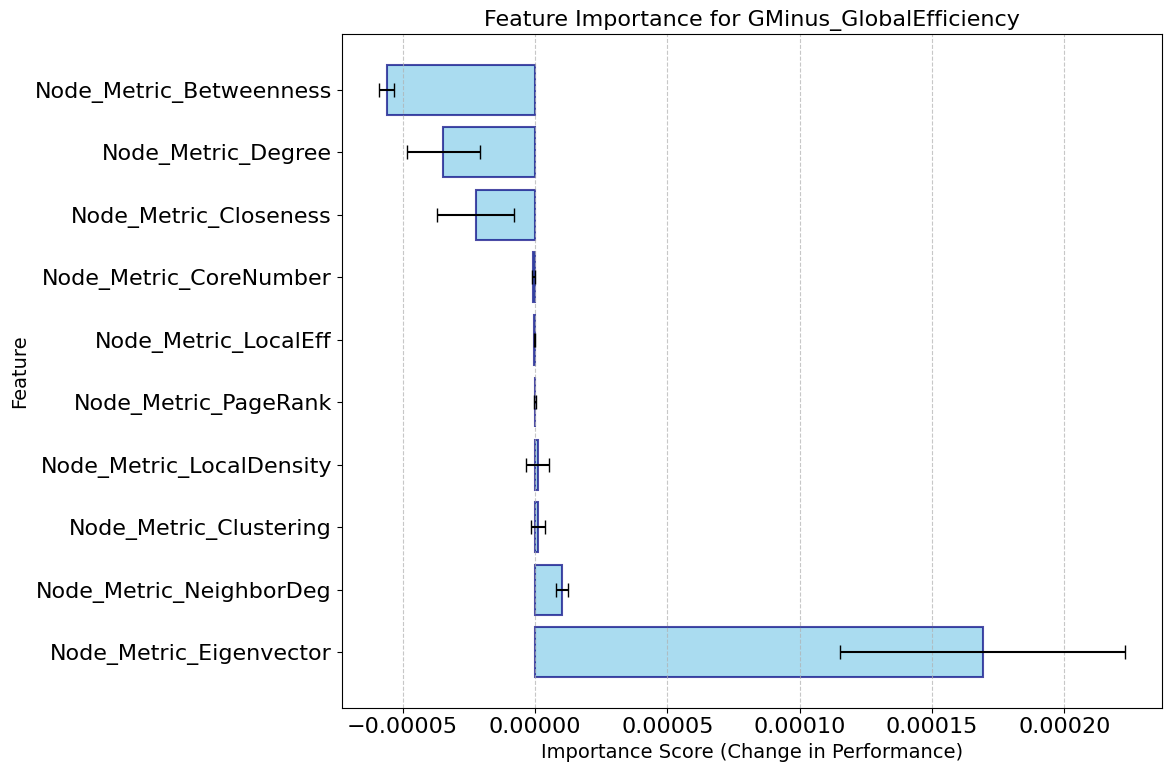


Feature Importance Ranking:
                    Feature    Importance           Std
0   Node_Metric_Eigenvector  1.690387e-04  5.370185e-05
1   Node_Metric_NeighborDeg  1.029972e-05  2.199396e-06
2    Node_Metric_Clustering  1.226120e-06  2.551178e-06
3  Node_Metric_LocalDensity  9.748061e-07  4.506720e-06
4      Node_Metric_PageRank -2.851448e-08  3.777302e-07
5      Node_Metric_LocalEff -2.649103e-07  1.038253e-07
6    Node_Metric_CoreNumber -5.822246e-07  6.443695e-07
7     Node_Metric_Closeness -2.238080e-05  1.461687e-05
8        Node_Metric_Degree -3.461265e-05  1.386493e-05
9   Node_Metric_Betweenness -5.598762e-05  2.929982e-06


In [4]:
# print("\nInitializing model...")
# node_feature_dim = train_data.x.shape[1]
# print(f"Node feature dimension: {node_feature_dim}")
# model = GNN(node_feature_dim=len(FEATURE_NAMES))

# Train model (uncomment if needed)
# print("\nTraining model...")
# losses, trained_model, feature_stats = model.train_model(
#     model, 
#     train_data=train_data,
#     test_data=test_data, 
#     target_idx=target_idx
# )

# Calculate permutation feature importance
importance_df = permutation_feature_importance(
    trained_model, 
    test_data, 
    FEATURE_NAMES, 
    n_repeats=3,
    metric='test_loss',
    higher_is_better=False,
    target_feature=target_feature,
    save_to_excel=True
)

# Plot feature importance
plot_feature_importance(importance_df, title=f"Feature Importance for {target_feature}")

# Print importance ranking
print("\nFeature Importance Ranking:")
pd.set_option('display.max_rows', None)
print(importance_df)